# FIN42100 Machine Learning for Finance: Group Assignement
## Bank Telemarketing and Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

**TASK 1:**

Perform and report exploratory data analytics in the data (e.g. visuals, descriptive statistics). State any observations which are pertinent to the purpose of this report, i.e., to inform a predictive model which can guide telephonic marketing.

In [2]:
bank_data = pd.read_csv('European_bank_marketing.csv')

In [3]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [4]:
bank_data.shape

(41188, 22)

In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit',
       'Ethnicity_African'],
      dtype='object')

In [6]:
bank_data.isnull().sum().sort_values(ascending = False)

age                  0
job                  0
term_deposit         0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
poutcome             0
previous             0
pdays                0
campaign             0
duration             0
day_of_week          0
month                0
contact              0
loan                 0
housing              0
default              0
education            0
marital              0
Ethnicity_African    0
dtype: int64

We have no instance of missing values in the dataset.

In [7]:
bank_data.nunique()

age                    78
job                    12
marital                 4
education               8
default                 3
housing                 3
loan                    3
contact                 2
month                  10
day_of_week             5
duration             1544
campaign               42
pdays                  27
previous                8
poutcome                3
emp.var.rate           10
cons.price.idx         26
cons.conf.idx          26
euribor3m             316
nr.employed            11
term_deposit            2
Ethnicity_African       2
dtype: int64

In [8]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,0.029353
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,0.168797
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000


**Term Deposit**

*Has the client subscribed a term deposit? 1 if yes, 0 if no.*

In [9]:
bank_data.term_deposit.value_counts()

0    36548
1     4640
Name: term_deposit, dtype: int64

We have an unbalanced class of the outcome variable where we have more instances of people not subscribing to term deposit over people subscribing to a term deposit through the marketing campaign.

**Age**

*Age of the customer in years (Numeric)*

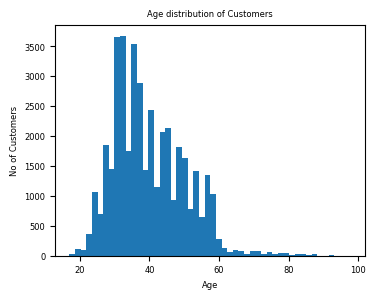

In [10]:
plt.figure(figsize=(4,3))
plt.hist(bank_data.age,bins=50)
plt.title('Age distribution of Customers',fontsize=6)
plt.xlabel('Age',fontsize=6)
plt.ylabel('No of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [11]:
bank_data.age.mean()

40.02406040594348

Mean Age of customers is 40 years.

**Job**

*Job Status (Categorical)*

In [12]:
(bank_data.job.value_counts()/bank_data.shape[0])*100

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

* The top five jobs for volume - Admin, Blue-Collar, Technician, Services and Management account for ~80% of the data.
* The proportion of 'unknown' job-status is <1%.

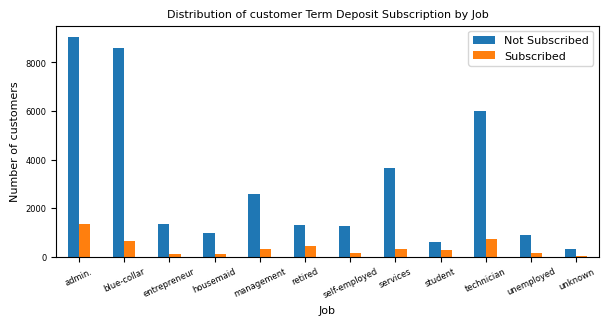

In [13]:
pd.crosstab(bank_data.job, bank_data.term_deposit).plot(kind='bar',fontsize=6, figsize=(7,3))
plt.xticks(rotation=25)
plt.xlabel('Job', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Job',fontsize=8)
plt.show()

In [14]:
pd.crosstab(bank_data.job, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
job,,
admin.,0.870274,0.129726
blue-collar,0.931057,0.068943
entrepreneur,0.914835,0.085165
housemaid,0.900000,0.100000
management,0.887825,0.112175
retired,0.747674,0.252326
self-employed,0.895144,0.104856
services,0.918619,0.081381
student,0.685714,0.314286


Retired and Student customers have the highest proportion of subscribing customers.

**Marital Status**

*Marital Status (Categorical)*

In [15]:
(bank_data.marital.value_counts()/bank_data.shape[0])*100

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

Proportion of 'unknown' marital status is negligible. 

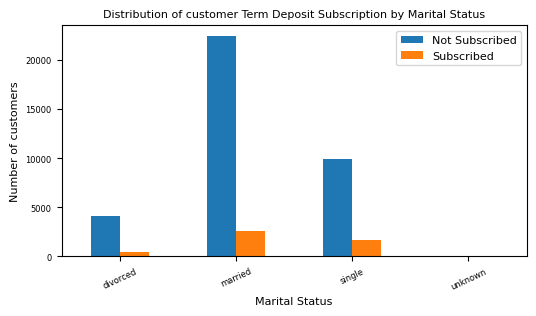

In [16]:
pd.crosstab(bank_data.marital, bank_data.term_deposit).plot(kind='bar',fontsize=6,figsize=(6,3))
plt.xticks(rotation=25)
plt.xlabel('Marital Status', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Marital Status',fontsize=8)
plt.show()

In [17]:
pd.crosstab(bank_data.marital, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000
All,0.887346,0.112654


Single customers are more likely than Divorced and Married customers to subscribe to the term deposit.

**Education**

*Level of Education (Categorical)*

In [18]:
(bank_data.education.value_counts()/bank_data.shape[0])*100

university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

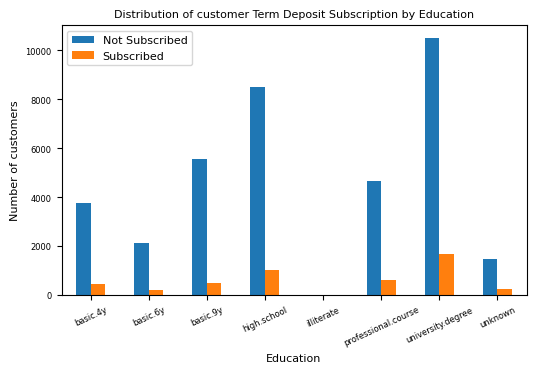

In [19]:
pd.crosstab(bank_data.education, bank_data.term_deposit).plot(kind='bar',figsize=(6,3.5),fontsize=6)
plt.xticks(rotation=25)
plt.xlabel('Education', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper left',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Education',fontsize=8)
plt.show()

In [20]:
pd.crosstab(bank_data.education, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
education,,
basic.4y,0.897510,0.102490
basic.6y,0.917976,0.082024
basic.9y,0.921754,0.078246
high.school,0.891645,0.108355
illiterate,0.777778,0.222222
professional.course,0.886515,0.113485
university.degree,0.862755,0.137245
unknown,0.854997,0.145003
All,0.887346,0.112654


**Default Status**

*Is there any history of default? (Categorical)*

In [21]:
(bank_data.default.value_counts()/bank_data.shape[0])*100

no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64

In [22]:
pd.crosstab(bank_data.default, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
default,,
no,0.871210,0.128790
unknown,0.948470,0.051530
yes,1.000000,0.000000
All,0.887346,0.112654


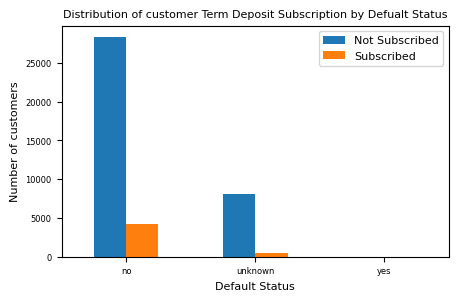

In [23]:
pd.crosstab(bank_data.default, bank_data.term_deposit).plot(kind='bar',figsize=(5,3),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Default Status', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Defualt Status',fontsize=8)
plt.show()

All those who do not have a default history, are more likely to subscribe to a term deposit.

**Housing**

*Has availed Housing Loan? (Categorical)*

In [24]:
(bank_data.housing.value_counts()/bank_data.shape[0])*100

yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64

In [25]:
pd.crosstab(bank_data.housing, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
housing,,
no,0.891204,0.108796
unknown,0.891919,0.108081
yes,0.883806,0.116194
All,0.887346,0.112654


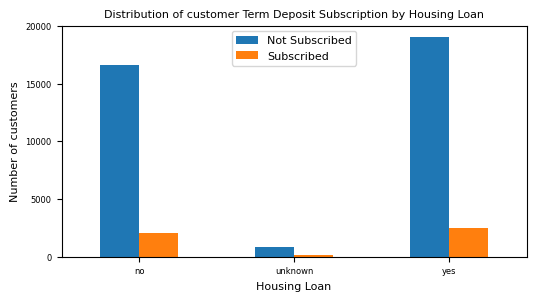

In [26]:
pd.crosstab(bank_data.housing, bank_data.term_deposit).plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Housing Loan', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper center',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Housing Loan',fontsize=8)
plt.show()

**Loan**

*Has availed Personal Loan? (Categorical)*

In [27]:
(bank_data.loan.value_counts()/bank_data.shape[0])*100

no         82.426920
yes        15.169467
unknown     2.403613
Name: loan, dtype: float64

In [28]:
pd.crosstab(bank_data.loan, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315
All,0.887346,0.112654


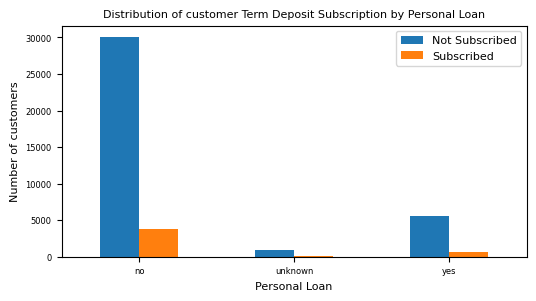

In [29]:
pd.crosstab(bank_data.loan, bank_data.term_deposit).plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Personal Loan', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Personal Loan',fontsize=8)
plt.show()

**Contact**

*Contact Communication Type (Categorical)*

In [30]:
(bank_data.contact.value_counts()/bank_data.shape[0])*100

cellular     63.474798
telephone    36.525202
Name: contact, dtype: float64

In [31]:
pd.crosstab(bank_data.contact, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
contact,,
cellular,0.852624,0.147376
telephone,0.947687,0.052313
All,0.887346,0.112654


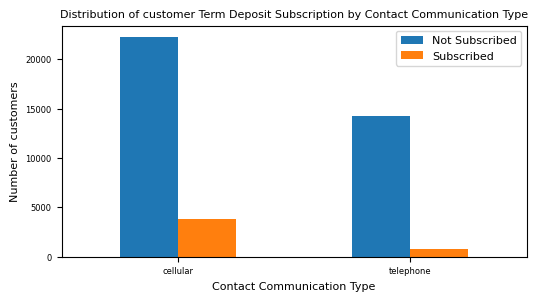

In [32]:
pd.crosstab(bank_data.contact, bank_data.term_deposit).plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Contact Communication Type', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Contact Communication Type',fontsize=8)
plt.show()

Cellular channel is the more used channel and has a higher success rate in getting customers to subscribe to the term deposit.

**Month**

*Last Contact Month of the year (Categorical)*

In [33]:
(bank_data.month.value_counts()/bank_data.shape[0])*100

may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: month, dtype: float64

In [34]:
pd.crosstab(bank_data.month, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
month,,
apr,0.795213,0.204787
aug,0.893979,0.106021
dec,0.510989,0.489011
jul,0.909534,0.090466
jun,0.894885,0.105115
mar,0.494505,0.505495
may,0.935653,0.064347
nov,0.898561,0.101439
oct,0.561281,0.438719


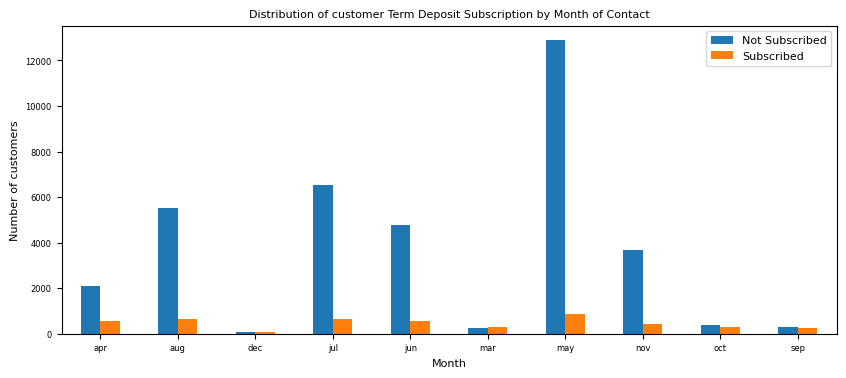

In [35]:
pd.crosstab(bank_data.month, bank_data.term_deposit).plot(kind='bar',figsize=(10,4),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Month', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.title('Distribution of customer Term Deposit Subscription by Month of Contact',fontsize=8)
plt.show()

* The months of December, March, October and September have higher success rate but lower volume of customers contacted.
* Most customers are contacted in May, June, July, August and November, where we see the least numbers of customers subscribing.

**Day of the Week**

*Last Contact Day of the Week (Categorical)*

In [36]:
(bank_data.day_of_week.value_counts()/bank_data.shape[0])*100

thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: day_of_week, dtype: float64

In [37]:
pd.crosstab(bank_data.day_of_week, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
day_of_week,,
fri,0.891913,0.108087
mon,0.900517,0.099483
thu,0.878812,0.121188
tue,0.882200,0.117800
wed,0.883329,0.116671
All,0.887346,0.112654


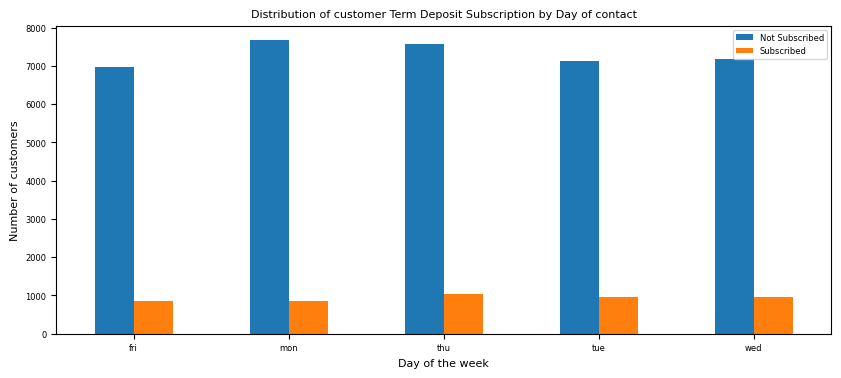

In [38]:
pd.crosstab(bank_data.day_of_week, bank_data.term_deposit).plot(kind='bar',figsize=(10,4),fontsize=6)
plt.xticks(rotation=0)
plt.xlabel('Day of the week', fontsize=8)
plt.ylabel('Number of customers', fontsize=8)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=6)
plt.title('Distribution of customer Term Deposit Subscription by Day of contact',fontsize=8)
plt.show()

Lower sucess rate for term deposit subscription through the campaign is seen when customer is contacted on Monday or Friday.

**Duration**

*Last Contact Duration in Seconds (Numeric)*

In [39]:
bank_data.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

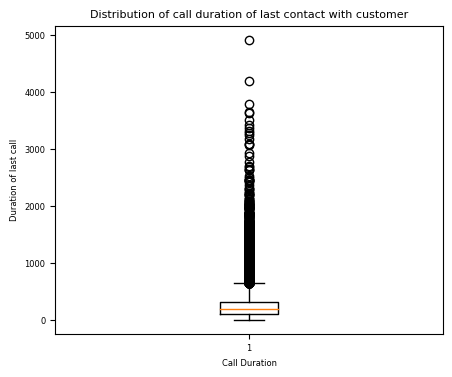

In [40]:
plt.figure(figsize=(5,4))
plt.boxplot(bank_data.duration)
plt.title('Distribution of call duration of last contact with customer',fontsize=8)
plt.ylabel('Duration of last call',fontsize=6)
plt.xlabel('Call Duration',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

Mean duration of a call with the customer is ~4 minutes.

**Campaign**

*# of contacts performed during this campaign and for this client (includes last contact) (Numeric)*

In [41]:
bank_data.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

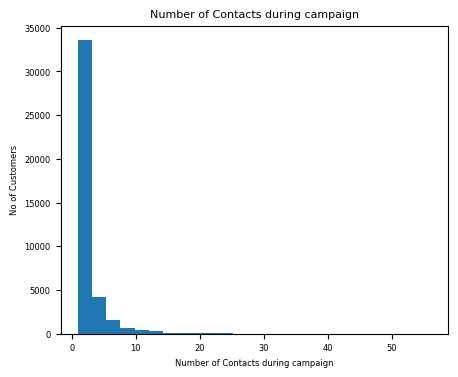

In [42]:
plt.figure(figsize=(5,4))
plt.hist(bank_data.campaign,bins=25)
plt.title('Number of Contacts during campaign',fontsize=8)
plt.xlabel('Number of Contacts during campaign',fontsize=6)
plt.ylabel('No of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**PDays**

*# of days that passed by after the client was last contacted from a previous campaign (999 means client was not contacted in a previous campaign) (Numeric)*

In [43]:
bank_data[bank_data.pdays!=999].pdays.describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

Only ~1500 customers have PDays different from 999. This means over 40,000 customers have not been contacted in the previous campaign.

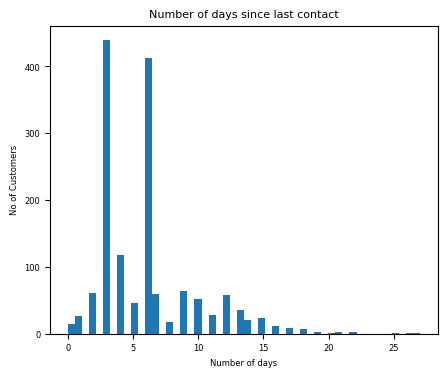

In [44]:
plt.figure(figsize=(5,4))
plt.hist(bank_data[bank_data.pdays!=999].pdays,bins=50)
plt.title('Number of days since last contact',fontsize=8)
plt.xlabel('Number of days',fontsize=6)
plt.ylabel('No of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**Previous**

*# of contacts performed before this campaign and for this client (Numeric)*

In [45]:
bank_data.previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

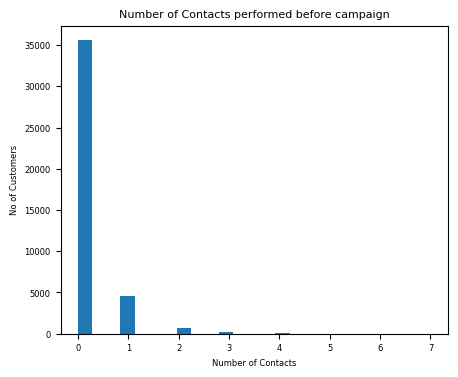

In [46]:
plt.figure(figsize=(5,4))
plt.hist(bank_data.previous,bins=25)
plt.title('Number of Contacts performed before campaign',fontsize=8)
plt.xlabel('Number of Contacts',fontsize=6)
plt.ylabel('No of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**POutcome**

*Outcome of the previous marketing campaign (Categorical)*

In [47]:
(bank_data.poutcome.value_counts()/bank_data.shape[0])*100

nonexistent    86.343110
failure        10.323395
success         3.333495
Name: poutcome, dtype: float64

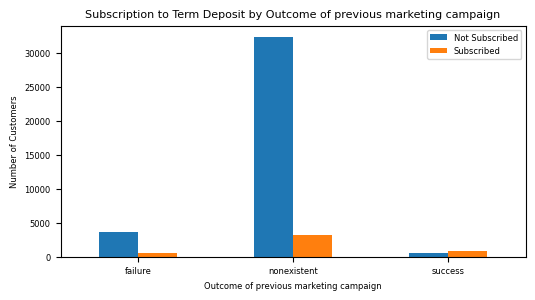

In [48]:
pd.crosstab(bank_data.poutcome, bank_data.term_deposit).plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xlabel('Outcome of previous marketing campaign',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.title('Subscription to Term Deposit by Outcome of previous marketing campaign',fontsize=8)
plt.xticks(rotation=0)
plt.legend(labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=6)
plt.show()

In [49]:
pd.crosstab(bank_data.poutcome, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
poutcome,,
failure,0.857714,0.142286
nonexistent,0.911678,0.088322
success,0.348871,0.651129
All,0.887346,0.112654


Customers who have subscribed to the term deposit in previous marketing campaigns, are more likely to subscribe to the term deposit in this campaign.

**Ethnicity**

*Caucasian is the reference ethnic category: Is the customer of African ethnicity? 1=Yes, 0=No; (Numeric)*

In [50]:
(bank_data.Ethnicity_African.value_counts()/bank_data.shape[0])*100

0    97.064679
1     2.935321
Name: Ethnicity_African, dtype: float64

In [51]:
pd.crosstab(bank_data.Ethnicity_African, bank_data.term_deposit, margins=True, normalize='index')

term_deposit,0,1
Ethnicity_African,,
0,0.895270,0.104730
1,0.625310,0.374690
All,0.887346,0.112654


Customers with African Ethnicity (Ethnicity_African=1) have a higher chance of subscribing to the term deposit. However, there are ethical concerns about using this variable as it creates bias.

**Emp.var.rate** 

*Employment variation rate: quarterly indicator (Numeric)*

In [52]:
bank_data['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

**Cons.price.idx**

*Consumer price index: monthly indicator (Numeric)*

In [53]:
bank_data['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

**Cons.conf.idx**

*Consumer confidence index: monthly indicator (Numeric)*

In [54]:
bank_data['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

**Euribor (3m)**

*Euribor 3 month rate (Numeric)*

In [55]:
bank_data['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

**Nr.employed:** 

*# of employees: quarterly indicator (Numeric)*

In [56]:
bank_data['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

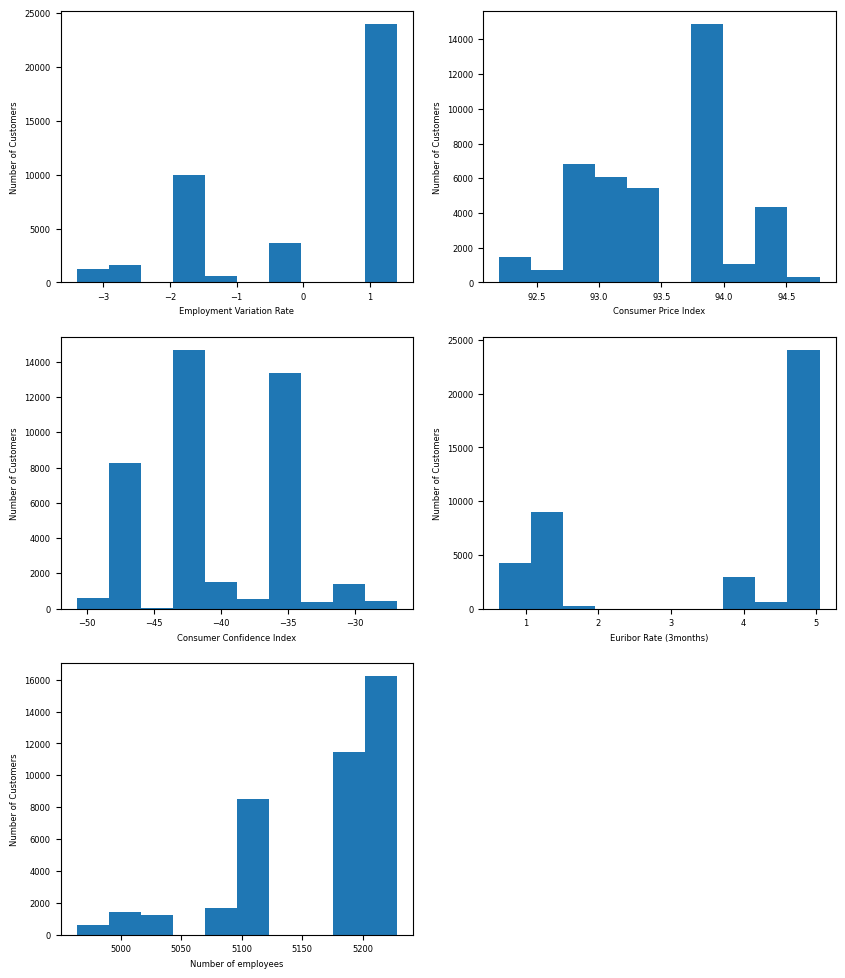

In [57]:
plt.figure(figsize = (10,12))

plt.subplot(3,2,1)
plt.hist(bank_data['emp.var.rate'])
plt.xlabel('Employment Variation Rate',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.subplot(3,2,2)
plt.hist(bank_data['cons.price.idx'])
plt.xlabel('Consumer Price Index',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.subplot(3,2,3)
plt.hist(bank_data['cons.conf.idx'])
plt.xlabel('Consumer Confidence Index',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.subplot(3,2,4)
plt.hist(bank_data['euribor3m'])
plt.xlabel('Euribor Rate (3months)',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.subplot(3,2,5)
plt.hist(bank_data['nr.employed'])
plt.xlabel('Number of employees',fontsize=6)
plt.ylabel('Number of Customers',fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.show()

In [58]:
bank_data.corr(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399,-0.008241
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274,0.050153
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357,-0.000686
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914,-0.040900
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181,0.032229
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334,-0.048399
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211,-0.022121
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878,0.008449
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771,-0.050266
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678,-0.058005


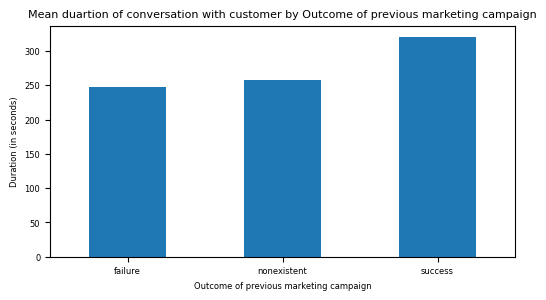

In [59]:
bank_data.groupby(['poutcome'])['duration'].mean().plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xlabel('Outcome of previous marketing campaign',fontsize=6)
plt.ylabel('Duration (in seconds)',fontsize=6)
plt.title('Mean duartion of conversation with customer by Outcome of previous marketing campaign',fontsize=8)
plt.xticks(rotation=0)
plt.show()

Customers with successful outcome in previous campaign have a higher duration of last contact 

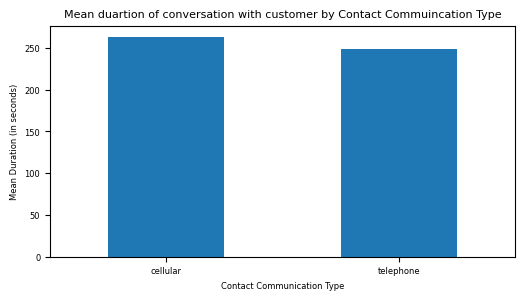

In [60]:
bank_data.groupby(['contact'])['duration'].mean().plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xlabel('Contact Communication Type',fontsize=6)
plt.ylabel('Mean Duration (in seconds)',fontsize=6)
plt.title('Mean duartion of conversation with customer by Contact Commuincation Type',fontsize=8)
plt.xticks(rotation=0)
plt.show()

Cellular channel has slighly higher mean duartion of last conversation over telephone channel.

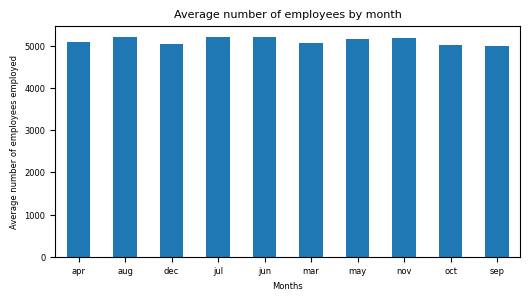

In [61]:
bank_data.groupby(['month'])['nr.employed'].mean().plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xlabel('Months',fontsize=6)
plt.ylabel('Average number of employees employed',fontsize=6)
plt.title('Average number of employees by month',fontsize=8)
plt.xticks(rotation=0)
plt.show()

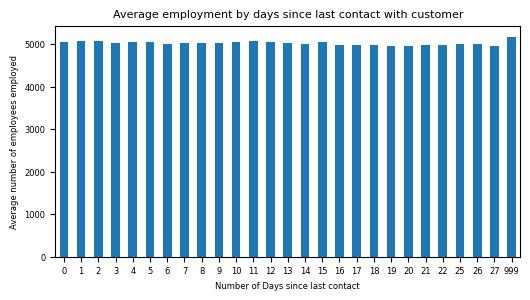

In [62]:
bank_data.groupby(['pdays'])['nr.employed'].mean().plot(kind='bar',figsize=(6,3),fontsize=6)
plt.xlabel('Number of Days since last contact',fontsize=6)
plt.ylabel('Average number of employees employed',fontsize=6)
plt.title('Average employment by days since last contact with customer',fontsize=8)
plt.xticks(rotation=0)
plt.show()

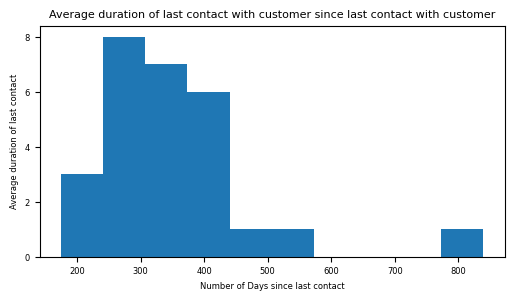

In [63]:
bank_data.groupby(['pdays'])['duration'].mean().plot(kind='hist',figsize=(6,3),fontsize=6)
plt.xlabel('Number of Days since last contact',fontsize=6)
plt.ylabel('Average duration of last contact',fontsize=6)
plt.title('Average duration of last contact with customer since last contact with customer',fontsize=8)
plt.xticks(rotation=0)
plt.show()

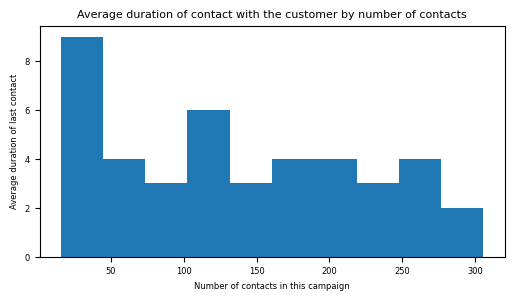

In [64]:
bank_data.groupby(['campaign'])['duration'].mean().plot(kind='hist',bins=10,figsize=(6,3),fontsize=6)
plt.xlabel('Number of contacts in this campaign',fontsize=6)
plt.ylabel('Average duration of last contact',fontsize=6)
plt.title('Average duration of contact with the customer by number of contacts',fontsize=8)
plt.xticks(rotation=0)
plt.show()

Duartion of conversation with customer is higher with lower number of contacts.

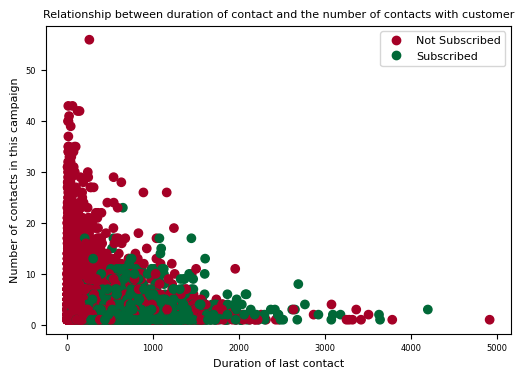

In [65]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(bank_data.duration, bank_data.campaign, c=bank_data.term_deposit, cmap='RdYlGn')
plt.ylabel('Number of contacts in this campaign',fontsize=8)
plt.xlabel('Duration of last contact',fontsize=8)
plt.title('Relationship between duration of contact and the number of contacts with customer',fontsize=8)
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Subscribed','Subscribed'],loc='upper right',fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()